In [98]:
import os
import re
import statistics
from src.najdi_rok import najdi_rok
from src.zjisti_cenu import zjisti_cenu
import pandas as pd

In [99]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [100]:
df = pd.read_parquet(os.path.join("data","cnb_vyber.parquet"))

In [101]:
df = df.explode('008')

In [102]:
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

In [103]:
len(df)

855454

In [104]:
df.groupby("rok").size().nlargest()

rok
2008.0    16719
2007.0    16013
2010.0    15910
2009.0    15542
2012.0    15539
dtype: int64

In [105]:
df = df.dropna(subset=['245_a','100_a','rok'])

In [106]:
df['cena'] = df['020_c'].apply(lambda x: zjisti_cenu(x))

In [107]:
len(df)

679329

In [108]:
df['titul'] = df['245_a'].apply(lambda x: x[0][:-1].strip() if x[0][-1] in [':','/',';','='] else x[0].strip())
df['autorstvo'] = df['100_a'].apply(lambda x: ", ".join([y.replace(',','') for y in x]) if x != None else None)
df['autorstvo_kod'] = df['100_7'].apply(lambda x: x[0] if x != None else None)
df = df.sort_values(by='rok').drop_duplicates(subset=['titul','autorstvo'], keep='first')

In [109]:
len(df)

382200

In [110]:
from src.pocet_stran import pocet_stran

In [111]:
df['stran'] = df['300_a'].apply(lambda x: pocet_stran(x))

In [112]:
df[['300_a','stran']].sample(30)

,300_a,stran
001,,
nkc20091990674,[280 s. ;],280.0
cpk19960118266,[382 s. ;],382.0
bk196200459,[294 s. ;],294.0
cpk20031189969,[127 s. :],127.0
cpk19970209875,"[265 s., [40] s. obr. příl. :]",265.0
cpk19980363399,[100 s. :],100.0
cpk20010988280,[206 s. ;],206.0
cpk20010888761,[136 s. :],136.0
bk193902550,[181 - [V] s. ;],181.0


In [113]:
za_rok = 365 * 12 * 60
za_rok

262800

In [114]:
df.groupby('rok')['stran'].sum().tail()

rok
2020.0    1278459.0
2021.0    1325382.0
2022.0    1303679.0
2023.0    1194588.0
2024.0     634997.0
Name: stran, dtype: float64

<Axes: xlabel='rok'>

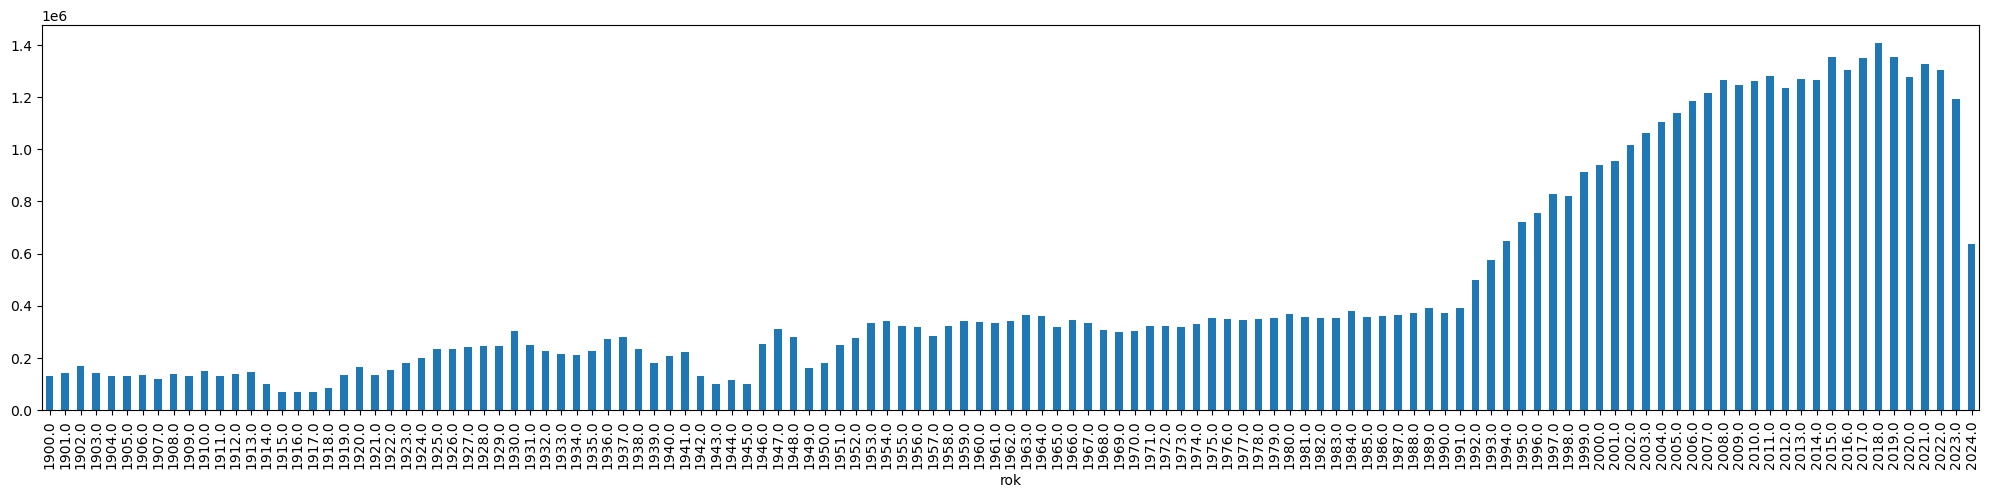

In [115]:
df.groupby('rok')['stran'].sum().plot.bar(figsize=(25,5))

In [116]:
df[df['stran'].notnull()].groupby('rok').size() / df.groupby('rok').size()

rok
1900.0    0.996293
1901.0    0.994220
1902.0    0.999237
1903.0    0.995819
1904.0    0.995701
1905.0    0.996310
1906.0    0.995833
1907.0    0.994783
1908.0    0.993740
1909.0    0.995802
1910.0    0.996995
1911.0    0.994318
1912.0    0.996006
1913.0    0.994665
1914.0    0.998965
1915.0    0.993949
1916.0    0.997211
1917.0    0.997214
1918.0    0.992823
1919.0    0.992486
1920.0    0.997144
1921.0    0.996631
1922.0    0.996497
1923.0    0.993963
1924.0    0.995076
1925.0    0.993513
1926.0    0.994914
1927.0    0.991837
1928.0    0.985986
1929.0    0.976578
1930.0    0.969296
1931.0    0.968970
1932.0    0.962575
1933.0    0.969620
1934.0    0.960236
1935.0    0.961557
1936.0    0.953282
1937.0    0.950190
1938.0    0.954943
1939.0    0.948224
1940.0    0.955916
1941.0    0.946204
1942.0    0.957597
1943.0    0.978972
1944.0    0.992118
1945.0    0.975319
1946.0    0.991739
1947.0    0.994827
1948.0    0.998058
1949.0    0.999278
1950.0    1.000000
1951.0    0.999015
1952.0  

Vyplněnost solidní!

In [118]:
df[['300_a','stran','245_a','rok']].sort_values(by="stran",ascending=False).head(20)

,300_a,stran,245_a,rok
001,,,,
nkc20183048417,[3 svazky (3496 stran) ;],3496.0,Španělsko-český slovník amerikanismů =,2018.0
nkc20091995200,"[2 sv. (xx, 1579, xvii, s.1581-3343) ;]",3343.0,Občanský soudní řád :,2009.0
nkc20203263529,"[2 svazky (xxx, 1-1642; ix, 1643-3331 stran) ;]",3331.0,Trestní zákoník :,2020.0
nos190227417,[2855 s. ;],2855.0,"Buffalo Bill, národní hrdina americký /",1908.0
nkc20132502112,[3 sv. (2733 s.) ;],2733.0,Komentář k zákonu o obchodních korporacích /,2013.0
nos190240810,[2710 s. ;],2710.0,Pražský kat :,1910.0
nkc20092012372,"[2 sv. (clxviii, 1316 s., s. 1317-2684) ;]",2684.0,Římská úmluva a Nařízení Řím I :,2009.0
nos190237542,[2636 s. ;],2636.0,"Královna Draga, záhuba Srbska čili kralovražda...",1903.0
nos190110115,"[3 sv. (1032 s., s. 1035-1736, 1737-2400+ ) :]",2400.0,"Lips Tulian, nejobávanější náčelník lupičů :",1906.0


In [119]:
stihando = df.groupby('rok')['stran'].sum() / za_rok
stihando

rok
1900.0    0.495152
1901.0    0.543893
1902.0    0.644882
1903.0    0.537017
1904.0    0.499623
1905.0    0.498166
1906.0    0.507679
1907.0    0.452009
1908.0    0.520057
1909.0    0.492850
1910.0    0.564083
1911.0    0.492995
1912.0    0.530567
1913.0    0.548318
1914.0    0.378352
1915.0    0.264973
1916.0    0.265818
1917.0    0.268771
1918.0    0.314947
1919.0    0.508535
1920.0    0.621130
1921.0    0.516328
1922.0    0.588992
1923.0    0.680746
1924.0    0.760103
1925.0    0.886145
1926.0    0.895361
1927.0    0.916229
1928.0    0.934844
1929.0    0.939844
1930.0    1.146050
1931.0    0.946686
1932.0    0.861100
1933.0    0.822123
1934.0    0.802812
1935.0    0.861743
1936.0    1.039890
1937.0    1.068082
1938.0    0.896012
1939.0    0.688120
1940.0    0.788992
1941.0    0.847275
1942.0    0.492664
1943.0    0.372873
1944.0    0.439833
1945.0    0.376872
1946.0    0.965746
1947.0    1.176815
1948.0    1.063505
1949.0    0.606792
1950.0    0.679901
1951.0    0.947732
1952.0  

In [120]:
stihando[stihando >= 1]

rok
1930.0    1.146050
1936.0    1.039890
1937.0    1.068082
1947.0    1.176815
1948.0    1.063505
1952.0    1.045731
1953.0    1.265761
1954.0    1.302470
1955.0    1.232264
1956.0    1.216884
1957.0    1.085141
1958.0    1.224132
1959.0    1.304296
1960.0    1.288318
1961.0    1.271001
1962.0    1.301952
1963.0    1.392846
1964.0    1.373790
1965.0    1.207333
1966.0    1.318531
1967.0    1.262519
1968.0    1.161332
1969.0    1.135027
1970.0    1.149589
1971.0    1.220030
1972.0    1.224521
1973.0    1.212336
1974.0    1.250731
1975.0    1.340388
1976.0    1.328699
1977.0    1.312492
1978.0    1.329437
1979.0    1.344243
1980.0    1.398474
1981.0    1.359110
1982.0    1.340365
1983.0    1.337359
1984.0    1.442412
1985.0    1.359833
1986.0    1.374041
1987.0    1.380217
1988.0    1.421834
1989.0    1.495072
1990.0    1.411750
1991.0    1.483113
1992.0    1.894399
1993.0    2.192835
1994.0    2.467302
1995.0    2.741248
1996.0    2.881933
1997.0    3.148642
1998.0    3.126435
1999.0  

In [121]:
df.groupby("rok").size().nlargest()

rok
2008.0    7616
2015.0    7460
2014.0    7352
2018.0    7317
2007.0    7310
dtype: int64

In [161]:
7616 / 16719

0.45552963694000836

In [122]:
df.groupby("rok")["stran"].sum().nlargest()

rok
2018.0    1406442.0
2019.0    1355197.0
2015.0    1352757.0
2017.0    1348209.0
2021.0    1325382.0
Name: stran, dtype: float64

In [123]:
stihando[stihando < 1]

rok
1900.0    0.495152
1901.0    0.543893
1902.0    0.644882
1903.0    0.537017
1904.0    0.499623
1905.0    0.498166
1906.0    0.507679
1907.0    0.452009
1908.0    0.520057
1909.0    0.492850
1910.0    0.564083
1911.0    0.492995
1912.0    0.530567
1913.0    0.548318
1914.0    0.378352
1915.0    0.264973
1916.0    0.265818
1917.0    0.268771
1918.0    0.314947
1919.0    0.508535
1920.0    0.621130
1921.0    0.516328
1922.0    0.588992
1923.0    0.680746
1924.0    0.760103
1925.0    0.886145
1926.0    0.895361
1927.0    0.916229
1928.0    0.934844
1929.0    0.939844
1931.0    0.946686
1932.0    0.861100
1933.0    0.822123
1934.0    0.802812
1935.0    0.861743
1938.0    0.896012
1939.0    0.688120
1940.0    0.788992
1941.0    0.847275
1942.0    0.492664
1943.0    0.372873
1944.0    0.439833
1945.0    0.376872
1946.0    0.965746
1949.0    0.606792
1950.0    0.679901
1951.0    0.947732
Name: stran, dtype: float64

In [124]:
stihando.nlargest(5)

rok
2018.0    5.351758
2019.0    5.156762
2015.0    5.147477
2017.0    5.130171
2021.0    5.043311
Name: stran, dtype: float64

In [125]:
365 * stihando[stihando.index == 1951].iloc[0]

345.9222222222222

In [126]:
df[df['072_x'].astype(str).str.contains('próza',na=False)].groupby("rok")['stran'].sum().tail()

rok
2020.0    402111.0
2021.0    465689.0
2022.0    458510.0
2023.0    439451.0
2024.0    280028.0
Name: stran, dtype: float64

In [127]:
df[df['072_x'].astype(str).str.contains('próza',na=False)].groupby("rok")['stran'].sum().tail() / za_rok

rok
2020.0    1.530103
2021.0    1.772028
2022.0    1.744711
2023.0    1.672188
2024.0    1.065556
Name: stran, dtype: float64

In [128]:
df[df['072_x'].astype(str).str.contains('próza',na=False)].groupby("rok")['stran'].sum().tail() / za_rok

rok
2020.0    1.530103
2021.0    1.772028
2022.0    1.744711
2023.0    1.672188
2024.0    1.065556
Name: stran, dtype: float64

In [129]:
(df[df['072_x'].astype(str).str.contains('próza',na=False) & (df['cena'].notnull())].groupby("rok").size() / df[df['072_x'].astype(str).str.contains('próza',na=False)].groupby("rok").size()).tail(5)

rok
2020.0    0.313001
2021.0    0.311208
2022.0    0.272678
2023.0    0.231087
2024.0    0.295977
dtype: float64

In [130]:
df[df['072_x'].astype(str).str.contains('próza',na=False)].groupby("rok")['cena'].median().tail()

rok
2020.0    299.0
2021.0    299.0
2022.0    349.0
2023.0    349.0
2024.0    369.0
Name: cena, dtype: float64